In [52]:
'''
README!!!

This code takes star cutouts of equal size (i.e. all star cutouts must be uniform) and creates an ePSF. I will outline the general process here. It may not be the most elegant code, but it does the trick. There are also a few notes throughout the code. Most of this code is taken from the 'building an effective Point Spread Function' webpage on the photutils documentation.
We start by importing our star cutouts. These cutouts were created using the cutout.py function that can also be found the GlikLab google drive under [nbrooke] -> [Useful Python Code]. For the method we use, they must all be the same size. We import each file individually as hdu{N}. Because fits files have a data component and a header component, we must extract the data. Hence, the hdu{N}[0].data lines.
Now we have all of our star data in usable form. We now place all of this data into one large array. If you insert plt.show() after the plt.imshow line, you can see the array you have created. We now get to the falsetable. This table is our mask, and allows us to mask out pixels we don't want the find_peaks function to consider as peaks. This includes double-counting stars or including very bright objects in the background. Use a high threshold for find_peaks so you don't need to mask too many pixels!
The next steps cut out the stars once again. We don't just use our original stars because they are not mathematically centered. We use find_peaks to center our stars. We then build our PSF using EPSFBuilder. See note next to function about what parameters to use/include. Also probably good to look into the documentation about EPSFBuilder. It pretty much the point of this whole thing after all.

date created: 5/20/20
author: Nick Brooke (nicholasbrooke2@gmail.com if you have any questions!)
'''

from astropy.io import fits
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import units as u
import numpy as np
from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
import astropy.io.fits as fits

Mosaic!


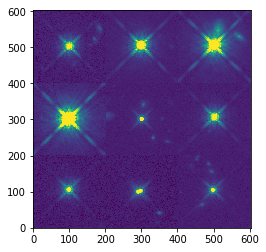

In [53]:
pathway = '/Users/ibehbehani/Documents/'

#Star selection note: do not use oversaturated stars!!
# The make the PSF worse and are annoying to deal with.

hdu1 = fits.open(pathway + 'W2M0811p0115/F105W/W2M0811p0115_f105_0.fits')
hdu2 = fits.open(pathway + 'W2M0811p0115/F105W/W2M0811p0115_f105_1.fits')
hdu3 = fits.open(pathway + 'W2M0811p0115/F105W/W2M0811p0115_f105_2.fits')
hdu4 = fits.open(pathway + 'W2M0811p0115/F105W/W2M0811p0115_f105_5.fits')
#hdu5 = fits.open(pathway + 'W2M0811p0115/F105W/W2M0811p0115_f105_4.fits')

hdu5 = fits.open(pathway + 'W2M1220p1126/F105W/W2M1220p1126_f105_0.fits')
hdu6 = fits.open(pathway + 'W2M1220p1126/F105W/W2M1220p1126_f105_1.fits')


#hdu10 = fits.open(pathway + 'W2M1252p0715/F105W/W2M1252p0715_f105_0.fits')
#hdu11 = fits.open(pathway + 'W2M1252p0715/F105W/W2M1252p0715_f105_1.fits')
#hdu12 = fits.open(pathway + 'W2M1252p0715/F105W/W2M1252p0715_f105_2.fits')

hdu7 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1439p0858_f105_0.fits')
hdu8 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1439p0858_f105_1.fits')
hdu9 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1439p0858_f105_2.fits')
#hdu10 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1439p0858_f105_3.fits')

#hdu17 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1542p1259_f105_0.fits')
#hdu18 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1542p1259_f105_1.fits')
#hdu19 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1542p1259_f105_2.fits')
#hdu20 = fits.open(pathway + 'W2M1439p0858/F105W/W2M1542p1259_f105_3.fits')


header = hdu1[0].header

data1 = hdu1[0].data
data2 = hdu2[0].data
data3 = hdu3[0].data
data4 = hdu4[0].data
data5 = hdu5[0].data
data6 = hdu6[0].data
data7 = hdu7[0].data
data8 = hdu8[0].data
data9 = hdu9[0].data
#data10 = hdu10[0].data

#data16 = hdu16[0].data
#data17 = hdu17[0].data
#data18 = hdu18[0].data
#data19 = hdu19[0].data
#data20 = hdu20[0].data

array1 = np.concatenate([data1, data2, data3])

array2 = np.concatenate([data4, data5, data6])

array3 = np.concatenate([data7, data8, data9])

#array4 = np.concatenate([data13, data14, data15])

#array5 = np.concatenate([data17, data18, data19, data20])


finalarray = np.hstack([array1, array2, array3])
data = finalarray

norm = simple_norm(finalarray, 'sqrt', percent=98.1) #linear, log, or sqrt
plt.imshow(finalarray, norm=norm, origin='lower', cmap='viridis')
print("Mosaic!")


falsetable = data<-100000 #creates a table with all values false. I'm sure there is a better way to do this.

#falsetable[y-coordinate][x-coordinate] = True
# use however many of these you need—set a high threshold in find_peaks (ideally the
# brightest pixel in your dimmest star) so you don't need to have 20 points to mask.
# Find values to mask in the peaks_tbl that is printed a few lines down.

In [54]:
from photutils import find_peaks
peaks_tbl = find_peaks(data, threshold=3000.,box_size=194,mask=falsetable,centroid_func=None)
#peaks_tbl = find_peaks(data, threshold=3000.,box_size=20,centroid_func=None)
peaks_tbl['peak_value'].info.format = '%.8g'  # for consistent table output  
print(peaks_tbl)

#this size should be the same as your star cutout size, or smaller.
size = 194
hsize = (size - 1) / 2
x = peaks_tbl['x_peak']  
y = peaks_tbl['y_peak']  
mask = ((x > hsize) & (x < (data.shape[1] -1 - hsize)) &
        (y > hsize) & (y < (data.shape[0] -1 - hsize)))

print(mask)

# create table of good star positions
from astropy.table import Table
stars_tbl = Table()
stars_tbl['x'] = x[mask]  
stars_tbl['y'] = y[mask]

#subtract background
from astropy.stats import sigma_clipped_stats
mean_val, median_val, std_val = sigma_clipped_stats(data, sigma=2.)  
data -= median_val

from astropy.nddata import NDData
nddata = NDData(data=data)

x_peak y_peak peak_value
------ ------ ----------
   291    100  124621.88
   498    105  205400.14
   100    106  384008.88
    99    301  7756191.5
   300    301  122906.05
   502    307  753005.62
   101    503  599097.44
   300    505  1643153.9
   500    505  5644930.5
[ True  True  True  True  True  True  True  True  True]


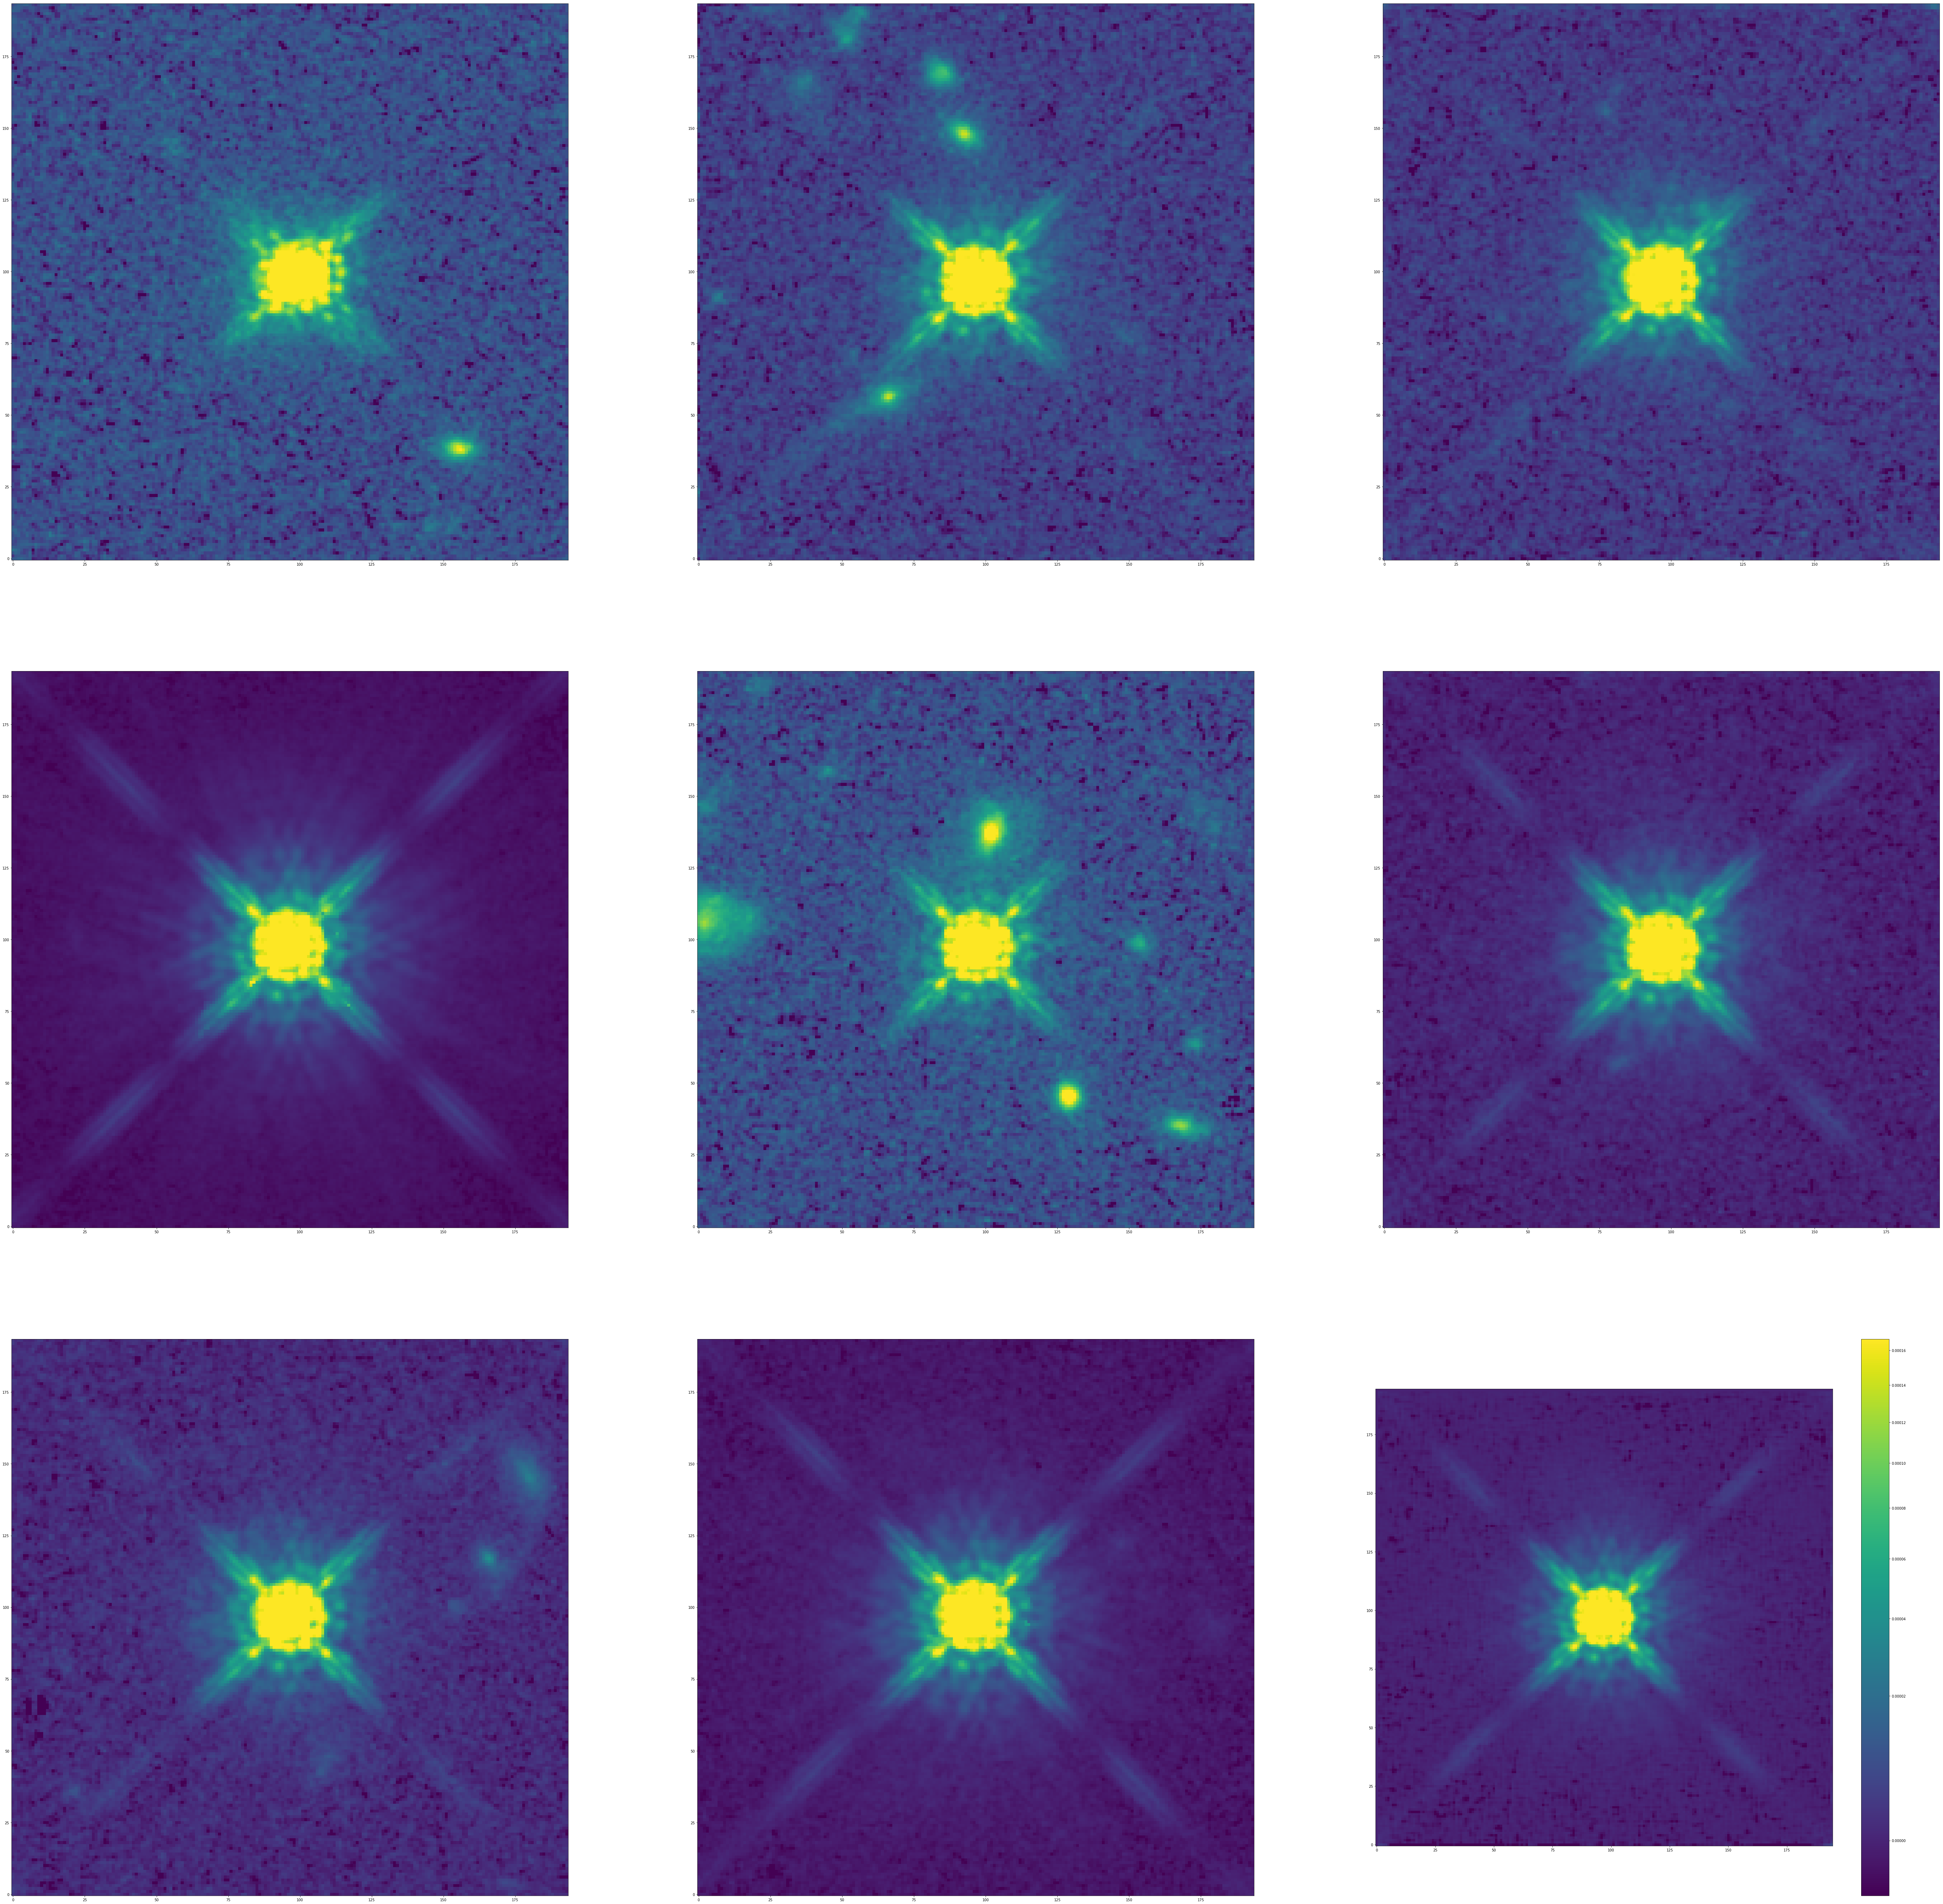

done


In [56]:
#extract cutouts
from photutils.psf import extract_stars
stars = extract_stars(nddata, stars_tbl, size=194) #starcutout size or smaller
import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
nrows = 3 # nrows and ncols should be the same size as finalarray we created earlier. 
          # Adjust these based on how many stars you have.
ncols = 3

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(100, 100),
                       squeeze=True)
ax = ax.ravel()

for i in range(nrows*ncols):
    norm = simple_norm(stars[i], 'sqrt', percent=98.)
    ax[i].imshow(stars[i], norm=norm, origin='lower', cmap='viridis')
#shows our star cutouts—very useful to make sure you are not counting any stray light artifacts as stars and not double counting stars, either.

from photutils import EPSFBuilder
epsf_builder = EPSFBuilder(oversampling=1, recentering_maxiters=20, maxiters=50,
                           progress_bar=True)
epsf, fitted_stars = epsf_builder(stars)
#This step can take a little while. Think about what oversampling value to use. Learn more about this in the source code. Also good to have at least maxiters=10.

import matplotlib.pyplot as plt
from astropy.visualization import simple_norm
norm = simple_norm(epsf.data, 'sqrt', percent=98.)
plt.imshow(epsf.data, norm=norm, origin='lower', cmap='viridis')

plt.colorbar()
plt.show()
print("done")

fits_name = 'psfnew.fits'

fits.writeto(fits_name,epsf.data,header=None,overwrite=True)
#Our PSF should show up in the folder the python code was run from.